In [1582]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [1583]:
def initial_visualization(d2_X,d2_Y,d5_X,d5_Y):
    X_1 = d2_X[d2_Y==1]
    X_0 = d2_X[d2_Y==0]
    plt.subplot(1, 2, 1)
    plt.title("2d data")
    plt.plot(X_1[:,0],X_1[:,1],'ro',color='red')
    plt.plot(X_0[:,0],X_0[:,1],'ro',color='blue')
    X_1 = d5_X[d5_Y==1]
    X_0 = d5_X[d5_Y==0]
    plt.subplot(1, 2, 2)
    plt.title("5d data")
    plt.plot(X_1[:,0],X_1[:,1],'ro',color='red')
    plt.plot(X_0[:,0],X_0[:,1],'ro',color='blue')
    plt.show()

In [1584]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [1585]:
def phi(W, b, X):
    return sigmoid(np.dot(W.T, X) + b)

In [1586]:
def cross_entropy(W, b, X, y):
    c_phi = phi(W, b, X)
    return  -((y * np.log(c_phi)) + ((1 - y) * np.log(1 - c_phi)))

In [1588]:
def dC_dW(W ,b ,X ,y):
    c_phi = phi(W, b, X)
    return (c_phi - y) * X

In [1589]:
def dC_db(W, b, X, y):
    c_phi = phi(W, b, X)
    return (c_phi - y)

In [1590]:
def initialize_weights(size):   
    return np.random.rand(size,1),np.random.rand()

In [1591]:
def dC_dW_n(W, b, X, y):
    g = np.zeros(X.shape)
    dlt = 1e-7
    cost = cross_entropy(W, b, X, y)

    for i in range(g.shape[0]):
        W_c = W.copy()
        W_c[i, :] += dlt
        cost2 = cross_entropy(W_c, b, X, y)
        g[i, :] = (cost2 - cost) / dlt
    return g

In [1592]:
def dC_db_n(W, b, X, y):
    g = np.zeros(X.shape[1])
    dlt = 1e-7
    cost = cross_entropy(W, b, X, y)
    b_c = b
    b_c += dlt
    cost2 = cross_entropy(W, b_c, X, y)        
    g = (cost2 - cost) / dlt    
    return g

In [1593]:
def check_gradient(W, b, X, y):
    d_dw = dC_dW(W,b,X,y)
    d_db = dC_db(W,b,X,y)
    d_dw_n = dC_dW_n(W,b,X,y)
    d_db_n = dC_db_n(W,b,X,y)
    rel_err_w = np.linalg.norm(d_dw-d_dw_n)/np.linalg.norm(d_dw)
    rel_err_b = np.linalg.norm(d_db-d_db_n)/np.linalg.norm(d_db)
    return rel_err_w,rel_err_b

In [1594]:
def mean_gradient(w,b,X,Y):
    dw = dC_dW(w,b,X,Y)
    db = dC_db(w,b,X,Y)
    dwm = np.sum(dw,axis=1)/X.shape[1]
    dwm = dwm.reshape((X.shape[0],1))
    dbm = np.sum(db,axis=1)/X.shape[1]
    dbm = dbm.reshape((1,1))
    return dwm,dbm

In [1595]:
def err(y_pred,Y):
    err = np.zeros((y_pred[0].shape))
    # print(y_pred[0].shape)
    for i,y in enumerate(y_pred[0]):
        if y >= 0.5:
            if(Y[0][i] == 0):
                err[i] = 1
        else:
            if(Y[0][i] == 1):
                err[i] = 1
    final_err = np.sum(err)/(y_pred[0].shape[0])
    return final_err,err

In [1596]:
def gradient_decent(lamb,w,b,X,Y):
    dw,db = mean_gradient(w,b,X,Y)
    count = 0
    ws = []
    bs = []
    es = []
    while True:
        w -= lamb * dw
        b -= lamb * db
        if np.linalg.norm(dC_dW(w,b,X,Y)) < 1.4 and np.linalg.norm(dC_db(w,b,X,Y)) < 1.4:
            break
        cost = np.sum(cross_entropy(w,b,X,Y))
        y_pred = phi(w,b,X)
        final_error,e = err(y_pred,Y)
        print('error: '+str(final_error))
        print('cost: '+str(cost))
        ws.append(w.tolist())
        bs.append(b.tolist())
        es.append(e.tolist())
        count +=1
    print(count)
    return np.array(es[-1]).T

In [1597]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals[0], '--')

In [1598]:
def visualize(i,X,y,w,b,e, ax):
    w = np.array(w)
    b = np.array(b)
    e = np.array(e)
    # print('------------------------')
    X = X.T
    y = y.flatten()
    ec = e[i].flatten()
    X_1 = X[y==1]
    X_0 = X[y==0]
    X_e = X[ec==1]
    
    plt.title("2d data")
    ax.clear()
    ax.plot(X_1[:,0],X_1[:,1],'ro',color='red')
    ax.plot(X_0[:,0],X_0[:,1],'ro',color='blue')
    ax.plot(X_e[:,0],X_e[:,1],'ro', color = 'white')
    ax.plot(X_e[:,0],X_e[:,1],'o',mfc = 'none', color = 'black')
    abline(-w[i][0]/w[i][1],-b[i]/w[i][1])
    ax.set_xlim([-5,5])
    ax.set_ylim([-7,7])

In [1599]:
raw_data_2d = np.load('data2d.npz')
X2 = raw_data_2d['X'].T
# X2 = X2[:,:-1]
Y2_r = raw_data_2d['y']
# Y2 = Y2[:-1]
Y2 = Y2_r.reshape((70,1)).T
raw_data_5d = np.load('data5d.npz')
X5 = raw_data_5d['X'].T
Y5_r = raw_data_5d['y']
Y5 = Y5_r.reshape((70,1)).T
w2,b2 = initialize_weights(X2.shape[0])
w5,b5 = initialize_weights(X5.shape[0])

/tmp/ipykernel_461642/3214411497.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_1[:,0],X_1[:,1],'ro',color='red')
/tmp/ipykernel_461642/3214411497.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_0[:,0],X_0[:,1],'ro',color='blue')
/tmp/ipykernel_461642/3214411497.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_1[:,0],X_1[:,1],'ro',color='red')
/tmp/ipykernel_461642/3214411497.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_0[:,0],X_0[:,1],'ro',color='blue')


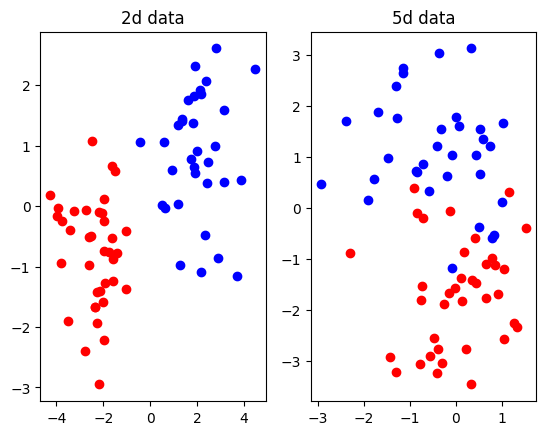

In [1605]:
initial_visualization(X2.T, Y2_r, X5.T, Y5_r)

In [1601]:
print(X2.shape)
print(Y2.shape)

(2, 70)
(1, 70)


In [1602]:
print(check_gradient(w2, b2, X2, Y2))
print(check_gradient(w5, b5, X5, Y5))

(3.330943634075347e-08, 1.867282783053728e-08)
(4.328265237932518e-08, 2.084903699188719e-08)


In [1603]:
# 0.8
gradient_decent(0.01,w2,b2,X2,Y2)

In [1604]:
# 1.4
# gradient_decent(0.1,w5,b5,X5,Y5) 

error: 0.3142857142857143
cost: 40.23503272503831
error: 0.24285714285714285
cost: 34.205290369883315
error: 0.2
cost: 28.956833343943412
error: 0.15714285714285714
cost: 24.436805952001286
error: 0.12857142857142856
cost: 20.583210954404215
error: 0.08571428571428572
cost: 17.327065609749454
error: 0.07142857142857142
cost: 14.595372108488709
error: 0.05714285714285714
cost: 12.315035057667725
error: 0.02857142857142857
cost: 10.416839337988494
error: 0.02857142857142857
cost: 8.838385755311407
error: 0.0
cost: 7.525496325726027
error: 0.0
cost: 6.432313388130796
error: 0.0
cost: 5.520617237400535
error: 0.0
cost: 4.758824299090631
error: 0.0
cost: 4.120946231677589
error: 0.0
cost: 3.585639132977342
error: 0.0
cost: 3.135384274969143
error: 0.0
cost: 2.7558012683755733
18


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])